In [1]:
# instalamos librería pca
!pip install -q pca
!pip install --upgrade plotly --q

# Tratamiento de datos
# ==============================================================================
import pandas as pd
from pandas.plotting import table
import numpy as np
import statsmodels.api as sm
import sklearn
import six
import ftplib
import os
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import date2num, num2date
import seaborn as sns
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib import animation
plt.style.use("ggplot")# for pretty graphs
from IPython.display import clear_output
import plotly.express as px

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import k_means
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Configuración warnings
# ==============================================================================
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd

     |████████████████████████████████| 23.9 MB 12 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from bs4 import BeautifulSoup
import requests
import os


In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [4]:
#Obtener las versiones de spark la pagina web
url = 'https://downloads.apache.org/spark/' 
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

# leer la pagina web y obtener las versiones de spark disponibles
link_files = []
for link in soup.find_all('a'):
  link_files.append(link.get('href'))
spark_link = [x for x in link_files if 'spark' in x]  
print(spark_link)

ver_spark = spark_link[1][:-1] # obtener la version y eliminar el caracter '/' del final
print(ver_spark)

 # libreria de manejo del sistema operativo
#instalar automaticamente la version deseadda de spark
link = "https://www-us.apache.org/dist/spark/"
os.system(f"wget -q {link}{ver_spark}/{ver_spark}-bin-hadoop2.7.tgz")
os.system(f"tar xf {ver_spark}-bin-hadoop2.7.tgz")

# instalar pyspark
#!pip install -q pyspark

['spark-2.4.8/', 'spark-3.0.3/', 'spark-3.1.2/']
spark-3.0.3


512

In [5]:
!pip install -q findspark

In [6]:
# Definir variables de entorno
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{ver_spark}-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

In [26]:
path = 'https://storage.googleapis.com/covid19-open-data/v2/weather.csv'
archivo1 = pd.read_csv(path, sep=",")

archivo1.head(5)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,2020-01-01,AD,08117099999,39.866801,5.233333,1.511111,9.166667,2.4765,NaN,0.177778,72.967738
1,2020-01-01,AE,41216099999,16.303110,21.261111,16.216667,26.083333,0.0000,NaN,11.555556,54.350613
2,2020-01-01,AF,40942099999,90.343387,5.027778,0.444444,9.555556,0.0000,NaN,-4.083333,55.903534
3,2020-01-01,AF_BAL,40911099999,8.359524,5.930556,0.798611,8.930556,0.0000,NaN,1.722222,74.572882
4,2020-01-01,AF_BAM,40948099999,180.669856,2.788889,-0.322222,5.988889,0.0000,NaN,-1.311111,75.079524


In [9]:
#Instalar Librería para leer el objeto R
!pip install pyreadr --q

     |████████████████████████████████| 409 kB 36.9 MB/s 


In [10]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

In [27]:
import pyreadr # librería para leer archivos generados con R
from urllib.request import urlopen # Necesario para leer el archivo RData con información Covid

#Leemos el archivo RData de datos Covid-19 desde el Github de Ruben F. Casal
url="https://github.com/rubenfcasal/COVID-19/blob/master/acumula2.RData?raw=true"
archivo = urlopen(url)
contenido = archivo.read()
fhandle = open( 'acumula2.RData', 'wb')
fhandle.write(contenido)
fhandle.close()
resultado = pyreadr.read_r("acumula2.RData")

# Convertimos el archivo R a Dataframe Pandas
print(resultado.keys()) # Validamos los objetos que obtenemos de los datos R que serán la base del DataFrame
df_covid = resultado["acumula2"] # Extracción de la información del objeto R hacia Pandas DataFrame
type(df_covid) # Validamos el dipo de objeto generado para confirmar que tenemos nuestro PD DataFrame

df_covid.head(20)

odict_keys(['acumula2'])


,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,ES,España,0,8,0,0
1,2020-01-01,AN,Andalucía,0,3,0,0
2,2020-01-01,AR,Aragón,0,0,0,0
3,2020-01-01,AS,Asturias,0,0,0,0
4,2020-01-01,CN,Canarias,0,0,0,0
5,2020-01-01,CB,Cantabria,0,0,0,0
6,2020-01-01,CL,Castilla y León,0,0,0,0
7,2020-01-01,CM,Castilla-La Mancha,0,0,0,0
8,2020-01-01,CT,Cataluña,0,1,0,0
9,2020-01-01,EA,Ceuta y Melilla,0,0,0,0


In [29]:
#FILTRAMOS POR VALORES DE ESPAÑA
df_clima_es = archivo1[archivo1.key.str[:3] == 'ES_']
df_clima_es.head()

,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8650,2020-01-01,ES_AN,08419099999,45.345976,8.402778,2.812500,16.409722,0.00000,NaN,4.562500,76.986560
8651,2020-01-01,ES_AR,08233099999,26.275638,1.097222,-1.854167,7.493056,0.00000,NaN,-1.571429,83.099552
8652,2020-01-01,ES_AS,08015099999,10.917524,4.319444,0.270833,10.152778,0.03175,NaN,2.381944,87.497387
8653,2020-01-01,ES_CB,08021099999,17.896943,4.141975,-0.388889,10.333333,0.00000,NaN,1.567901,83.792949
8654,2020-01-01,ES_CE,60320099999,5.628310,13.672840,10.117284,17.611111,0.00000,NaN,9.049383,73.775605


In [30]:
df_clima_es_1 = df_clima_es[df_clima_es['key'].str.len() <= 5] 


In [31]:
#AJUSTAMOS LAS KEYS PARA QUE CONTENGAN EL NOMBRE DE LA COMUNIDAD AUTÓNOMA
df_clima_es_1.loc[df_clima_es_1.key == "ES_AN", "key"] = "Andalucía"
df_clima_es_1.loc[df_clima_es_1.key == "ES_AR", "key"] = "Aragón"
df_clima_es_1.loc[df_clima_es_1.key == "ES_AS", "key"] = "Asturias"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CB", "key"] = "Cantabria"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CE", "key"] = "Ceuta y Melilla"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CL", "key"] = "Castilla y León"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CM", "key"] = "Castilla-La Mancha"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CN", "key"] = "Canarias"
df_clima_es_1.loc[df_clima_es_1.key == "ES_CT", "key"] = "Cataluña"
df_clima_es_1.loc[df_clima_es_1.key == "ES_EX", "key"] = "Extremadura"
df_clima_es_1.loc[df_clima_es_1.key == "ES_GA", "key"] = "Galicia"
df_clima_es_1.loc[df_clima_es_1.key == "ES_IB", "key"] = "Islas Baleares"
df_clima_es_1.loc[df_clima_es_1.key == "ES_MC", "key"] = "Murcia"
df_clima_es_1.loc[df_clima_es_1.key == "ES_MD", "key"] = "Madrid"
df_clima_es_1.loc[df_clima_es_1.key == "ES_ML", "key"] = "Ceuta y Melilla"
df_clima_es_1.loc[df_clima_es_1.key == "ES_NC", "key"] = "Navarra"
df_clima_es_1.loc[df_clima_es_1.key == "ES_PV", "key"] = "País Vasco"
df_clima_es_1.loc[df_clima_es_1.key == "ES_RI", "key"] = "La Rioja"
df_clima_es_1.loc[df_clima_es_1.key == "ES_VC", "key"] = "Comunidad Valenciana"

df_clima_es_1.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8650,2020-01-01,Andalucía,08419099999,45.345976,8.402778,2.812500,16.409722,0.000000,NaN,4.562500,76.986560
8651,2020-01-01,Aragón,08233099999,26.275638,1.097222,-1.854167,7.493056,0.000000,NaN,-1.571429,83.099552
8652,2020-01-01,Asturias,08015099999,10.917524,4.319444,0.270833,10.152778,0.031750,NaN,2.381944,87.497387
8653,2020-01-01,Cantabria,08021099999,17.896943,4.141975,-0.388889,10.333333,0.000000,NaN,1.567901,83.792949
8654,2020-01-01,Ceuta y Melilla,60320099999,5.628310,13.672840,10.117284,17.611111,0.000000,NaN,9.049383,73.775605
8655,2020-01-01,Castilla y León,08141099999,37.358106,3.227778,-0.927778,11.500000,0.000000,NaN,-3.116667,71.034165
8656,2020-01-01,Castilla-La Mancha,08231099999,97.311812,3.955556,-0.761111,11.166667,0.000000,NaN,1.567901,86.483125
8657,2020-01-01,Canarias,60020099999,49.901717,16.627778,13.388889,19.466667,0.000000,NaN,3.844444,45.436329
8753,2020-01-01,Cataluña,08186099999,49.496159,5.409722,2.111111,9.722222,1.415143,NaN,1.520833,78.354407
9833,2020-01-01,Extremadura,08261099999,33.613475,6.166667,2.061728,12.462963,0.000000,NaN,3.006173,84.435759


In [32]:
#PASAMOS NAs A 0
df_clima_total = df_clima_es_1.fillna(0)
df_clima_total.head(5)



,date,key,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8650,2020-01-01,Andalucía,08419099999,45.345976,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560
8651,2020-01-01,Aragón,08233099999,26.275638,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552
8652,2020-01-01,Asturias,08015099999,10.917524,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387
8653,2020-01-01,Cantabria,08021099999,17.896943,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949
8654,2020-01-01,Ceuta y Melilla,60320099999,5.628310,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605


In [33]:
#ELIMINAMOS 2 VARIABLES PARA ANÁLISIS
df_clima_final = df_clima_total.drop(columns=['noaa_station','noaa_distance'])
df_clima_final.head(5)

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
8650,2020-01-01,Andalucía,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560
8651,2020-01-01,Aragón,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552
8652,2020-01-01,Asturias,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387
8653,2020-01-01,Cantabria,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949
8654,2020-01-01,Ceuta y Melilla,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605


In [34]:
df_clima_final['date'] = pd.to_datetime(df_clima_final['date'])
df_covid['fecha'] = pd.to_datetime(df_covid['fecha'])

In [35]:
#UNIMOS AMBOS DATAFRAMES
df_final1 = pd.merge(df_clima_final, df_covid, how = 'left', left_on=['key','date'], right_on=['ccaa','fecha'])
df_final1.head(5)

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,Andalucía,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,2020-01-01,AN,Andalucía,0.0,3.0,0.0,0.0
1,2020-01-01,Aragón,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,2020-01-01,AR,Aragón,0.0,0.0,0.0,0.0
2,2020-01-01,Asturias,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,2020-01-01,AS,Asturias,0.0,0.0,0.0,0.0
3,2020-01-01,Cantabria,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949,2020-01-01,CB,Cantabria,0.0,0.0,0.0,0.0
4,2020-01-01,Ceuta y Melilla,13.672840,10.117284,17.611111,0.00000,0.0,9.049383,73.775605,2020-01-01,EA,Ceuta y Melilla,0.0,0.0,0.0,0.0


In [46]:
df_covid_clima = df_final1[~df_final1.key.str.contains("Ceuta y Melilla")]

In [47]:
df_covid_clima.head()

,date,key,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,fecha,iso,ccaa,confirmados,hospitalizados,uci,fallecidos
0,2020-01-01,Andalucía,8.402778,2.812500,16.409722,0.00000,0.0,4.562500,76.986560,2020-01-01,AN,Andalucía,0.0,3.0,0.0,0.0
1,2020-01-01,Aragón,1.097222,-1.854167,7.493056,0.00000,0.0,-1.571429,83.099552,2020-01-01,AR,Aragón,0.0,0.0,0.0,0.0
2,2020-01-01,Asturias,4.319444,0.270833,10.152778,0.03175,0.0,2.381944,87.497387,2020-01-01,AS,Asturias,0.0,0.0,0.0,0.0
3,2020-01-01,Cantabria,4.141975,-0.388889,10.333333,0.00000,0.0,1.567901,83.792949,2020-01-01,CB,Cantabria,0.0,0.0,0.0,0.0
5,2020-01-01,Castilla y León,3.227778,-0.927778,11.500000,0.00000,0.0,-3.116667,71.034165,2020-01-01,CL,Castilla y León,0.0,0.0,0.0,0.0


In [48]:
df_covid_clima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10478 entries, 0 to 11709
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 10478 non-null  datetime64[ns]
 1   key                  10478 non-null  object        
 2   average_temperature  10478 non-null  float64       
 3   minimum_temperature  10478 non-null  float64       
 4   maximum_temperature  10478 non-null  float64       
 5   rainfall             10478 non-null  float64       
 6   snowfall             10478 non-null  float64       
 7   dew_point            10478 non-null  float64       
 8   relative_humidity    10478 non-null  float64       
 9   fecha                10342 non-null  datetime64[ns]
 10  iso                  10342 non-null  category      
 11  ccaa                 10342 non-null  category      
 12  confirmados          10342 non-null  float64       
 13  hospitalizados       10342 non-

In [49]:
df_covid_clima.isnull().sum()

date                     0
key                      0
average_temperature      0
minimum_temperature      0
maximum_temperature      0
rainfall                 0
snowfall                 0
dew_point                0
relative_humidity        0
fecha                  136
iso                    136
ccaa                   136
confirmados            136
hospitalizados         136
uci                    136
fallecidos             136
dtype: int64

In [50]:
df_covid_clima.describe()

,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,hospitalizados,uci,fallecidos
count,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10342.000000,10342.000000,10342.000000,10342.000000
mean,15.631335,10.512437,21.162155,1.747216,5.533190,8.743208,66.687705,101306.548250,11851.371108,1070.282150,2677.820538
std,6.614097,5.989161,7.450156,3.973487,38.997348,4.919902,14.598039,167829.022067,18264.872310,1475.992079,3660.366029
min,-4.432099,-11.141975,-1.648148,0.000000,0.000000,-8.185185,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.650695,6.072222,15.653164,0.000000,0.000000,5.529514,58.052901,4902.000000,1350.000000,160.000000,339.000000
50%,15.169445,10.369213,20.478835,0.063500,0.000000,8.897917,68.724766,32535.500000,5309.000000,543.000000,1095.000000
75%,20.722222,15.141975,26.813889,1.491116,0.000000,12.307870,77.457576,110682.500000,13416.750000,1283.750000,3336.750000
max,33.611111,26.038889,43.191358,45.502286,909.320000,22.351852,98.902001,889103.000000,109279.000000,8339.000000,15919.000000


In [51]:
corr_var = df_covid_clima.corr(method="spearman",)
print("Matriz de correlación de Spearman:")
print("="*60)
corr_var.style.background_gradient(cmap='coolwarm')

Matriz de correlación de Spearman:


,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,hospitalizados,uci,fallecidos
average_temperature,1.000000,0.960684,0.972038,-0.306881,-0.274789,0.792479,-0.600244,0.096195,0.146548,0.171421,0.141920
minimum_temperature,0.960684,1.000000,0.880162,-0.189714,-0.232250,0.859383,-0.444174,0.078938,0.115326,0.155677,0.102486
maximum_temperature,0.972038,0.880162,1.000000,-0.388751,-0.300776,0.709351,-0.679015,0.097871,0.155914,0.167450,0.157681
rainfall,-0.306881,-0.189714,-0.388751,1.000000,0.274827,-0.020781,0.499259,0.017031,0.011999,-0.012151,0.025017
snowfall,-0.274789,-0.232250,-0.300776,0.274827,1.000000,-0.188994,0.248300,0.053725,0.067141,0.048228,0.065397
dew_point,0.792479,0.859383,0.709351,-0.020781,-0.188994,1.000000,-0.063377,-0.011872,-0.000675,0.042847,-0.011754
relative_humidity,-0.600244,-0.444174,-0.679015,0.499259,0.248300,-0.063377,1.000000,-0.162191,-0.218688,-0.217517,-0.220379
confirmados,0.096195,0.078938,0.097871,0.017031,0.053725,-0.011872,-0.162191,1.000000,0.943475,0.951900,0.924386
hospitalizados,0.146548,0.115326,0.155914,0.011999,0.067141,-0.000675,-0.218688,0.943475,1.000000,0.975869,0.986390
uci,0.171421,0.155677,0.167450,-0.012151,0.048228,0.042847,-0.217517,0.951900,0.975869,1.000000,0.942241


In [52]:
correlation_mat = df_covid_clima.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

average_temperature  average_temperature    1.000000
                     minimum_temperature    0.957894
                     maximum_temperature    0.973326
                     rainfall              -0.203163
                     snowfall              -0.208550
                                              ...   
fallecidos           relative_humidity     -0.220279
                     confirmados            0.917370
                     hospitalizados         0.932525
                     uci                    0.923133
                     fallecidos             1.000000
Length: 121, dtype: float64


In [53]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

relative_humidity    maximum_temperature   -0.694321
maximum_temperature  relative_humidity     -0.694321
relative_humidity    average_temperature   -0.618295
average_temperature  relative_humidity     -0.618295
relative_humidity    minimum_temperature   -0.444276
                                              ...   
rainfall             rainfall               1.000000
maximum_temperature  maximum_temperature    1.000000
minimum_temperature  minimum_temperature    1.000000
uci                  uci                    1.000000
fallecidos           fallecidos             1.000000
Length: 121, dtype: float64

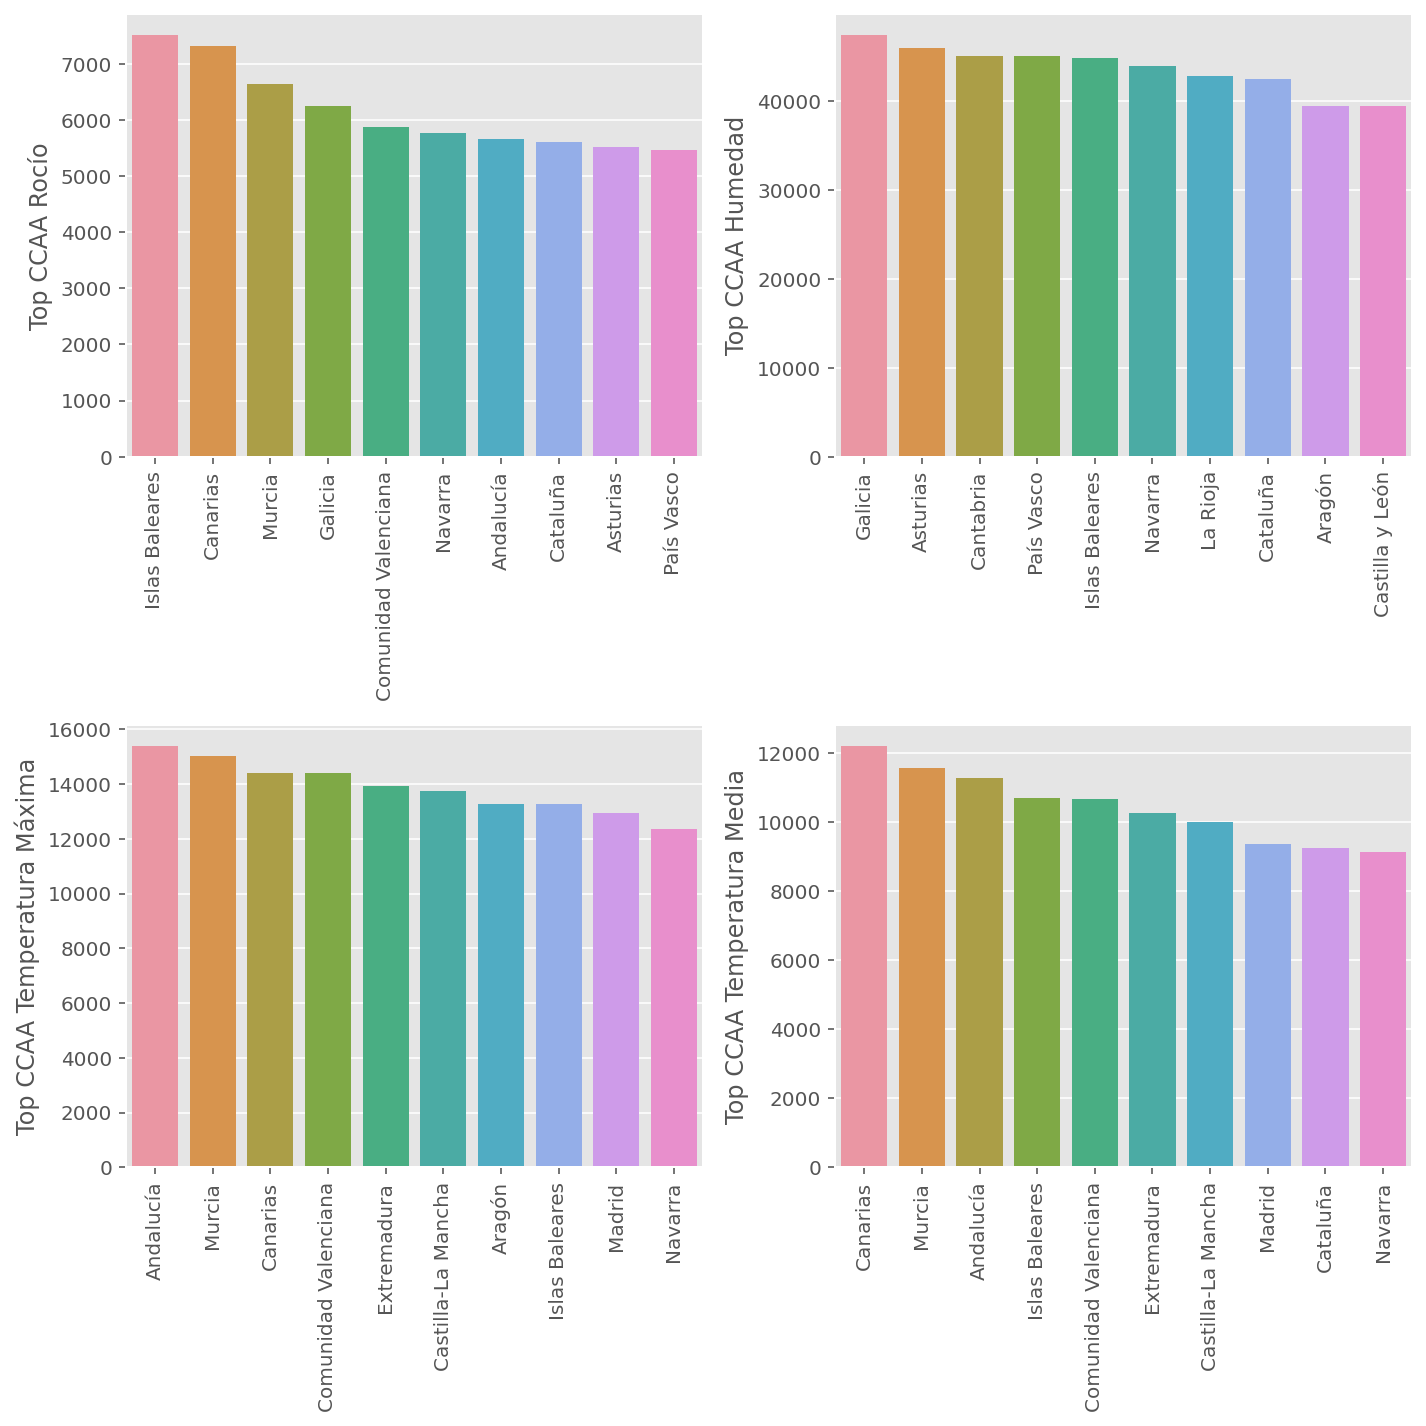

In [54]:
# densidad poblacional  -top 10 de paises

fig, axs = plt.subplots(2,2,figsize = (10,10))


top10_maximum_temperature = df_covid_clima.groupby('key').sum().sort_values('maximum_temperature', ascending=False).head(10)
plt1 = sns.barplot(x=top10_maximum_temperature.index, y='maximum_temperature', data= top10_maximum_temperature, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Top CCAA Temperatura Máxima')

top10_average_temperature = df_covid_clima.groupby('key').sum().sort_values('average_temperature', ascending=False).head(10)
plt1 = sns.barplot(x=top10_average_temperature.index, y='average_temperature', data= top10_average_temperature, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'Top CCAA Temperatura Media')

top10_relative_humidity = df_covid_clima.groupby('key').sum().sort_values('relative_humidity', ascending=False).head(10)
plt1 = sns.barplot(x=top10_relative_humidity.index, y='relative_humidity', data= top10_relative_humidity, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Top CCAA Humedad')

top10_dew_point = df_covid_clima.groupby('key').sum().sort_values('dew_point', ascending=False).head(10)
plt1 = sns.barplot(x=top10_dew_point.index, y='dew_point', data= top10_dew_point, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Top CCAA Rocío')



for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1361643a50>],
      dtype=object)

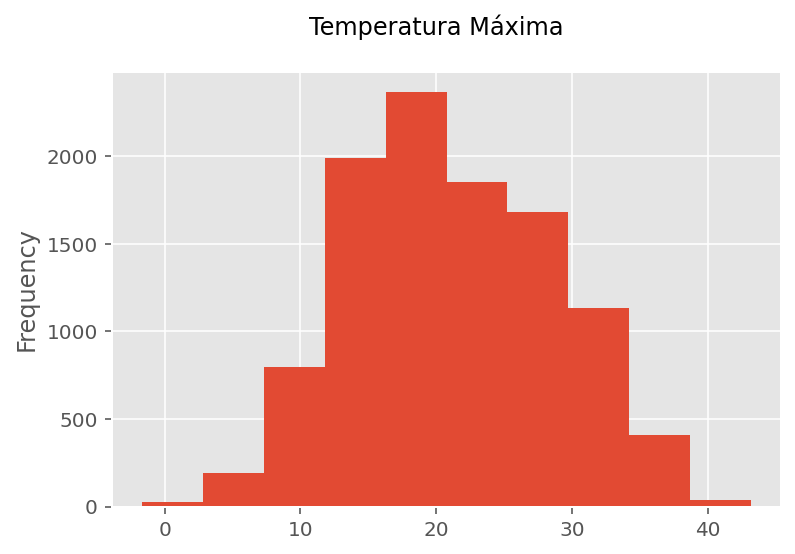

In [55]:
df_covid_clima['maximum_temperature'].plot(kind='hist',bins=10,title='Temperatura Máxima',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f136b6b7710>],
      dtype=object)

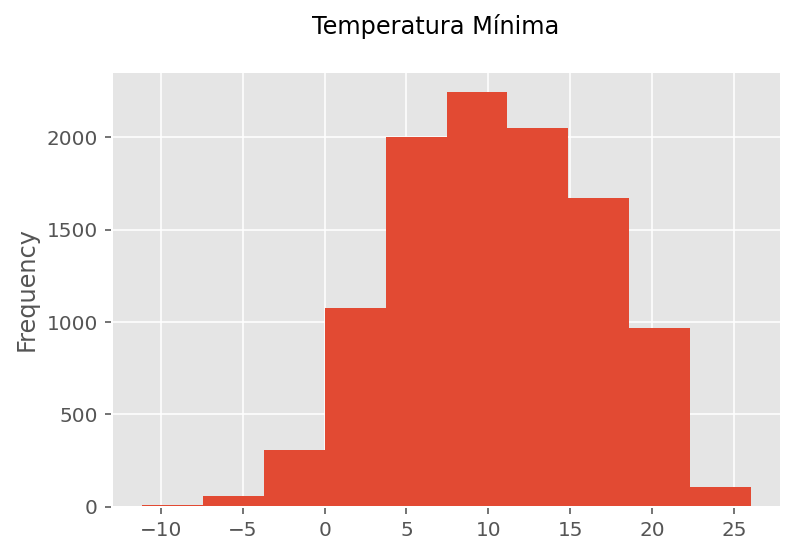

In [56]:
df_covid_clima['minimum_temperature'].plot(kind='hist',bins=10,title='Temperatura Mínima',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f136b877550>],
      dtype=object)

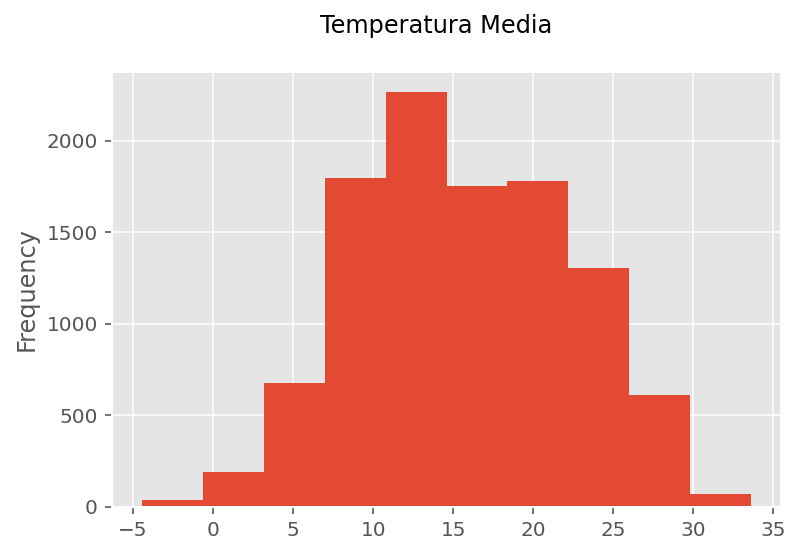

In [57]:
df_covid_clima['average_temperature'].plot(kind='hist',bins=10,title='Temperatura Media',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1363159b50>],
      dtype=object)

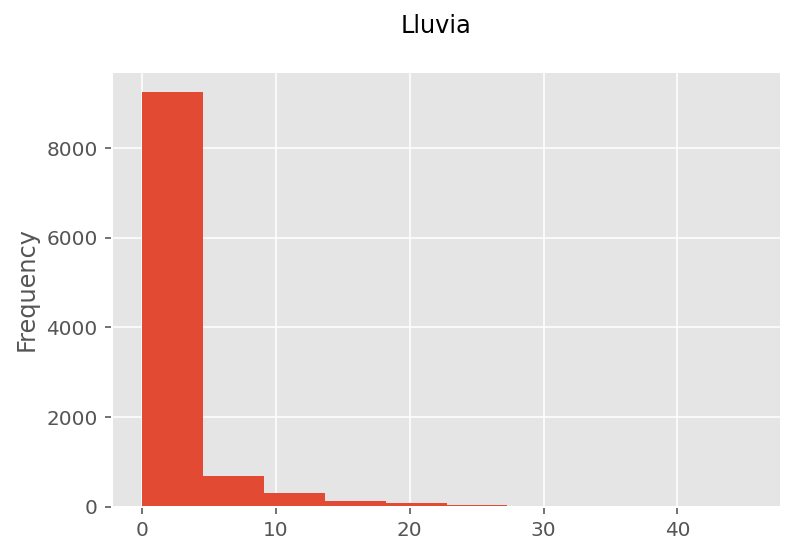

In [58]:
df_covid_clima['rainfall'].plot(kind='hist',bins=10,title='Lluvia',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f136b650bd0>],
      dtype=object)

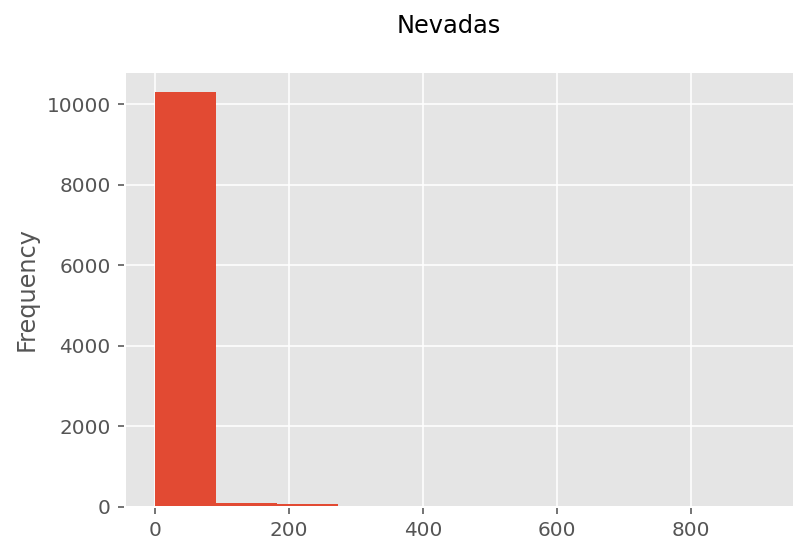

In [59]:
df_covid_clima['snowfall'].plot(kind='hist',bins=10,title='Nevadas',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f136b7e9990>],
      dtype=object)

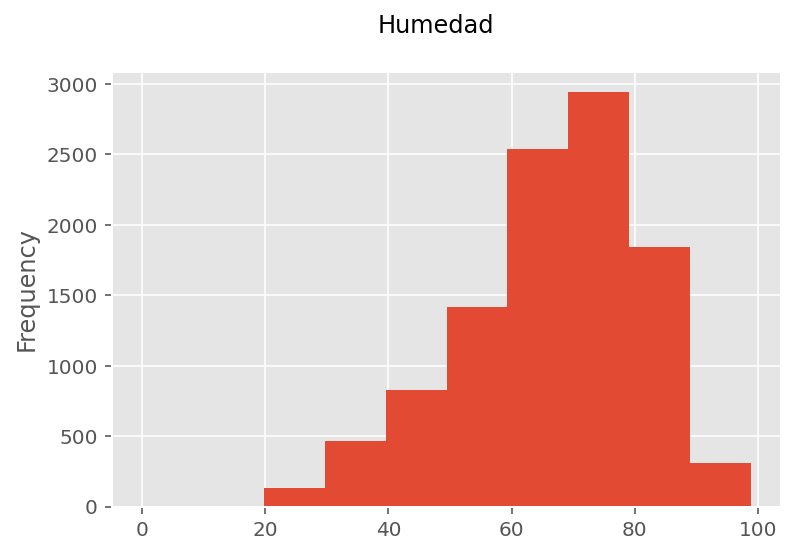

In [60]:
df_covid_clima['relative_humidity'].plot(kind='hist',bins=10,title='Humedad',subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f136b84cf50>],
      dtype=object)

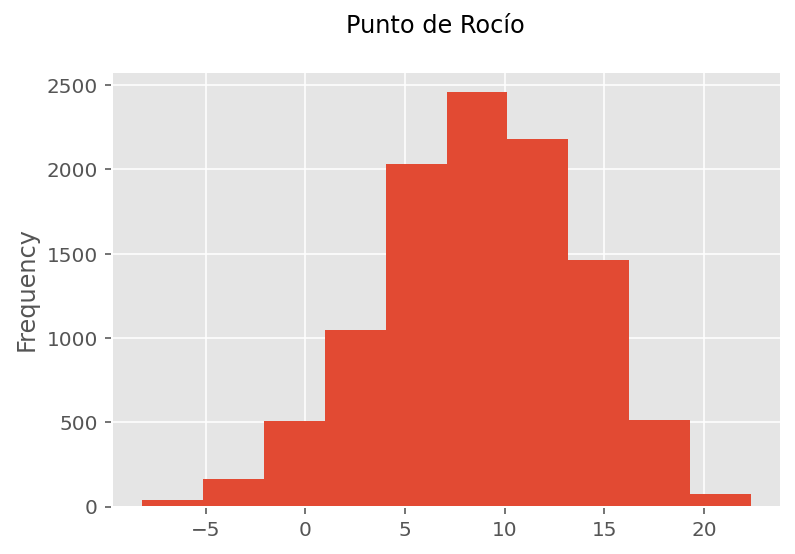

In [61]:
df_covid_clima['dew_point'].plot(kind='hist',bins=10,title='Punto de Rocío',subplots=True)

In [62]:
df_final_atipicos = df_covid_clima
def atipicos(df,Columnas):
  for c in Columnas:
    IQR=np.percentile(df[c],75)-np.percentile(df[c],25)
    M=np.mean(df[c])
    CEINF=M-3*IQR
    CESUP=M+3*IQR
    df['Atipicos_Cerc_'+c]=(df[c]<CEINF)|(df[c]>CESUP)
    df['Atipicos_Perc_'+c]=(df[c]<np.percentile(df[c],1))|(df[c]>np.percentile(df[c],99))
atipicos(df_final_atipicos,['maximum_temperature','minimum_temperature', 
                'rainfall', 'snowfall', 'average_temperature', 'relative_humidity', 'dew_point', 'uci', 'fallecidos', 'confirmados', 'hospitalizados'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [63]:
def PROC_FREQ(df,columnas):
  for c in columnas:
    x=df[c].value_counts().to_frame()
    nombre=x.columns.tolist()[0]
    x.rename(columns={nombre:'Freq'},inplace=True)
    x['Pct']=x['Freq']/x.Freq.sum()
    x['Freq Acum'],x['Pct Acum']=x.Freq.cumsum(),x.Pct.cumsum()
    x.sort_values(['Freq'],ascending=[0],inplace=True)
    print('Tabla de distribución de frecuencias para la variable: '+nombre)
    print('\n')
    print(x)
    print('\n')

cols = [c for c in df_final_atipicos.columns if 'Atipicos' in c]
PROC_FREQ(df_final_atipicos,cols)

Tabla de distribución de frecuencias para la variable: Atipicos_Cerc_maximum_temperature


        Freq  Pct  Freq Acum  Pct Acum
False  10478  1.0      10478       1.0


Tabla de distribución de frecuencias para la variable: Atipicos_Perc_maximum_temperature


        Freq       Pct  Freq Acum  Pct Acum
False  10268  0.979958      10268  0.979958
True     210  0.020042      10478  1.000000


Tabla de distribución de frecuencias para la variable: Atipicos_Cerc_minimum_temperature


        Freq  Pct  Freq Acum  Pct Acum
False  10478  1.0      10478       1.0


Tabla de distribución de frecuencias para la variable: Atipicos_Perc_minimum_temperature


        Freq       Pct  Freq Acum  Pct Acum
False  10268  0.979958      10268  0.979958
True     210  0.020042      10478  1.000000


Tabla de distribución de frecuencias para la variable: Atipicos_Cerc_rainfall


       Freq       Pct  Freq Acum  Pct Acum
False  9550  0.911433       9550  0.911433
True    928  0.088567      10478  1.000000

Text(0, 0.5, 'Conteo')

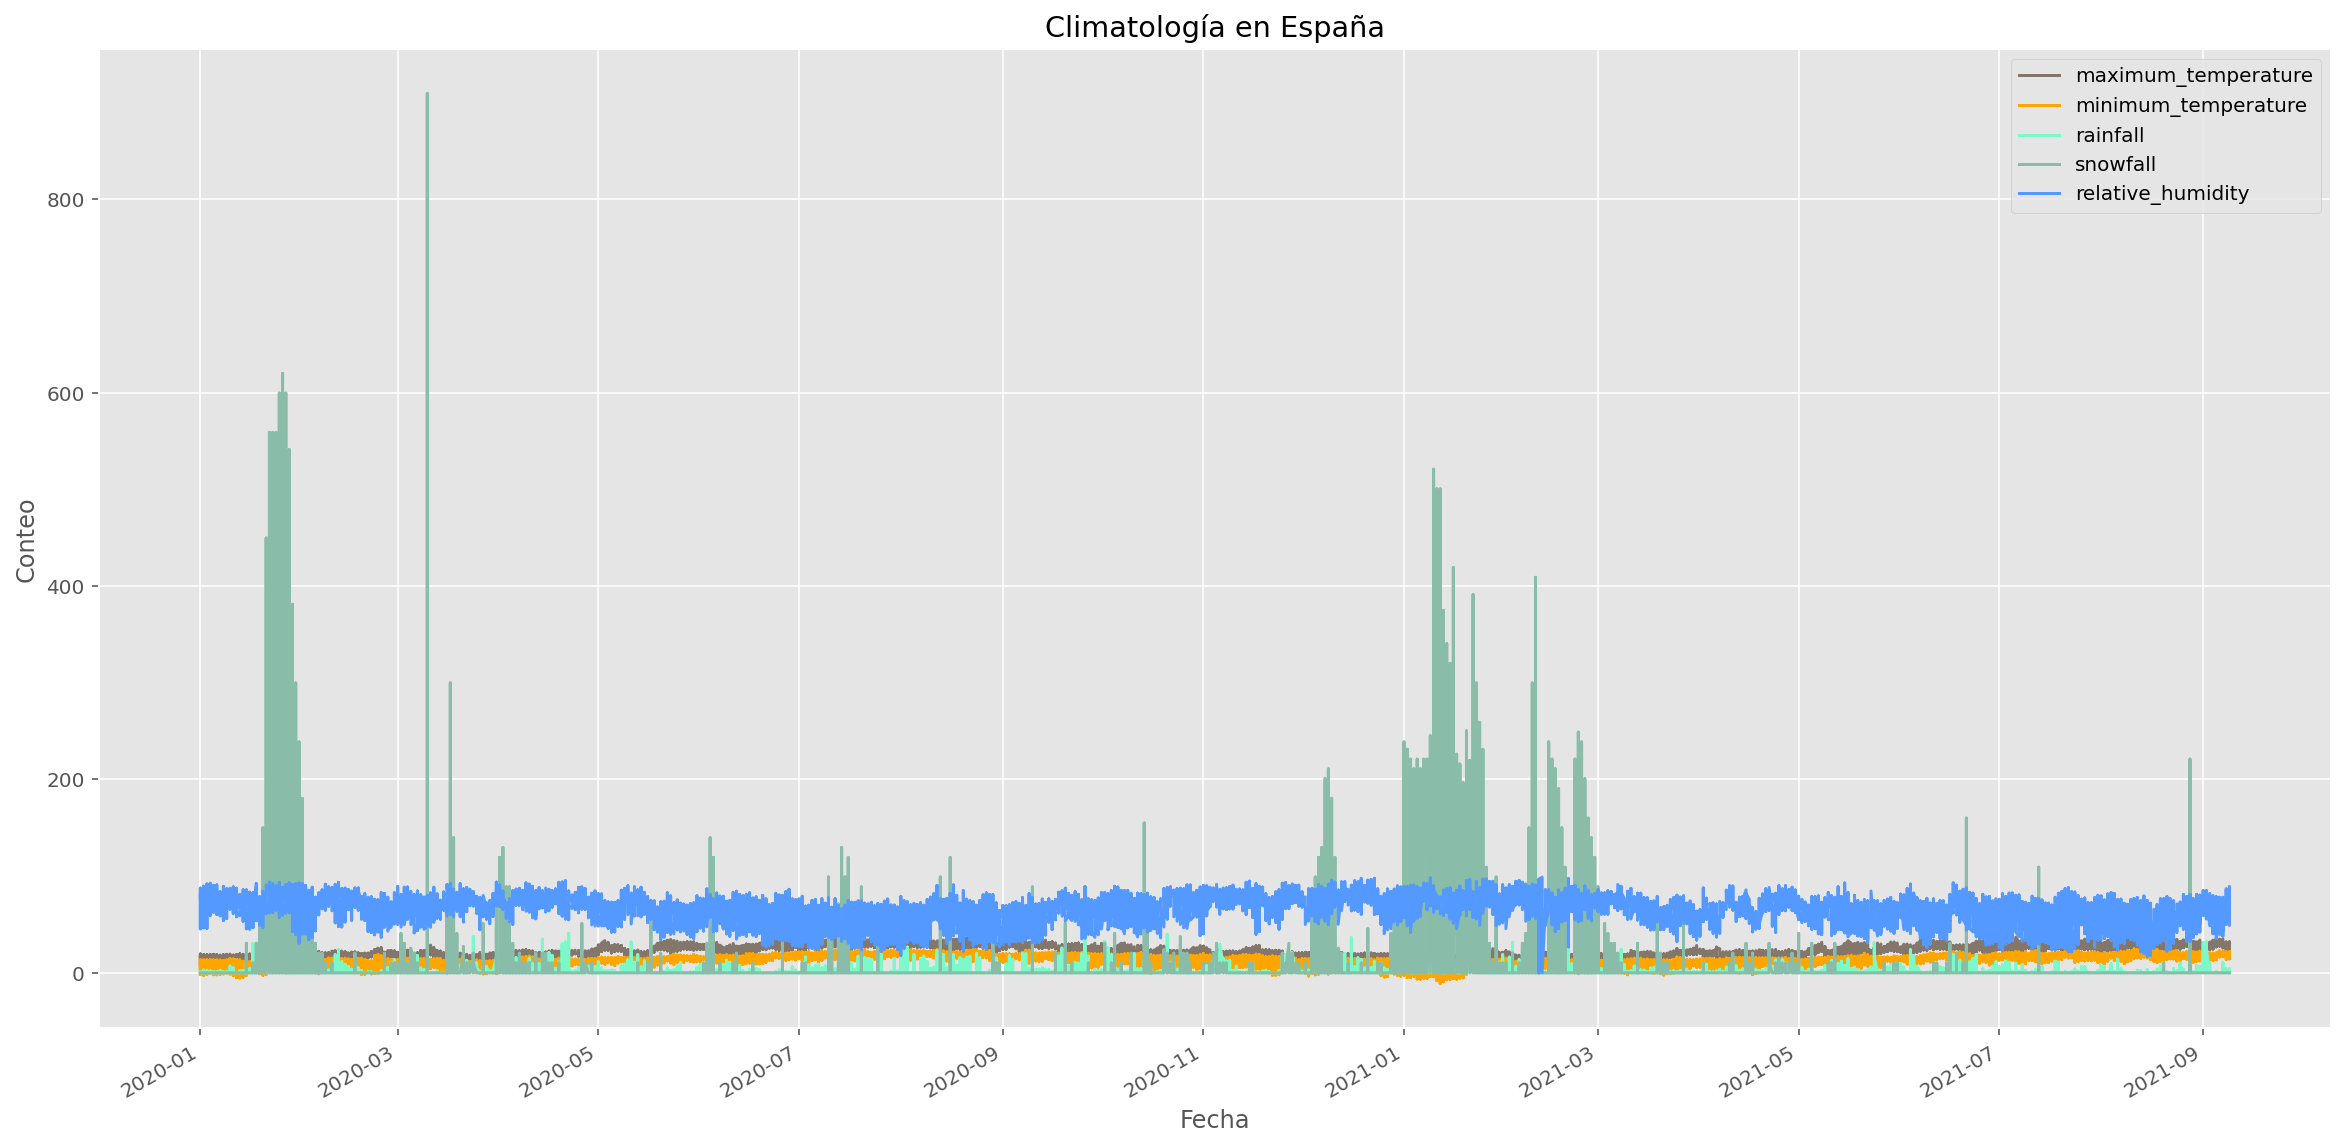

In [64]:
style.use('ggplot')
ax = plt.gca()
df_covid_clima.plot.line(x='date', y='maximum_temperature', color='#83776B', ax=ax, figsize=(20, 10))
df_covid_clima.plot.line(x='date', y='minimum_temperature', color='orange', ax=ax)
df_covid_clima.plot.line(x='date', y='rainfall', color='#7BF9C9', ax=ax)
df_covid_clima.plot.line(x='date', y='snowfall', color='#89BDAA', ax=ax)
df_covid_clima.plot.line(x='date', y='relative_humidity', color='#5399FF', ax=ax)
plt.title('Climatología en España')
plt.xlabel('Fecha')
plt.ylabel('Conteo')

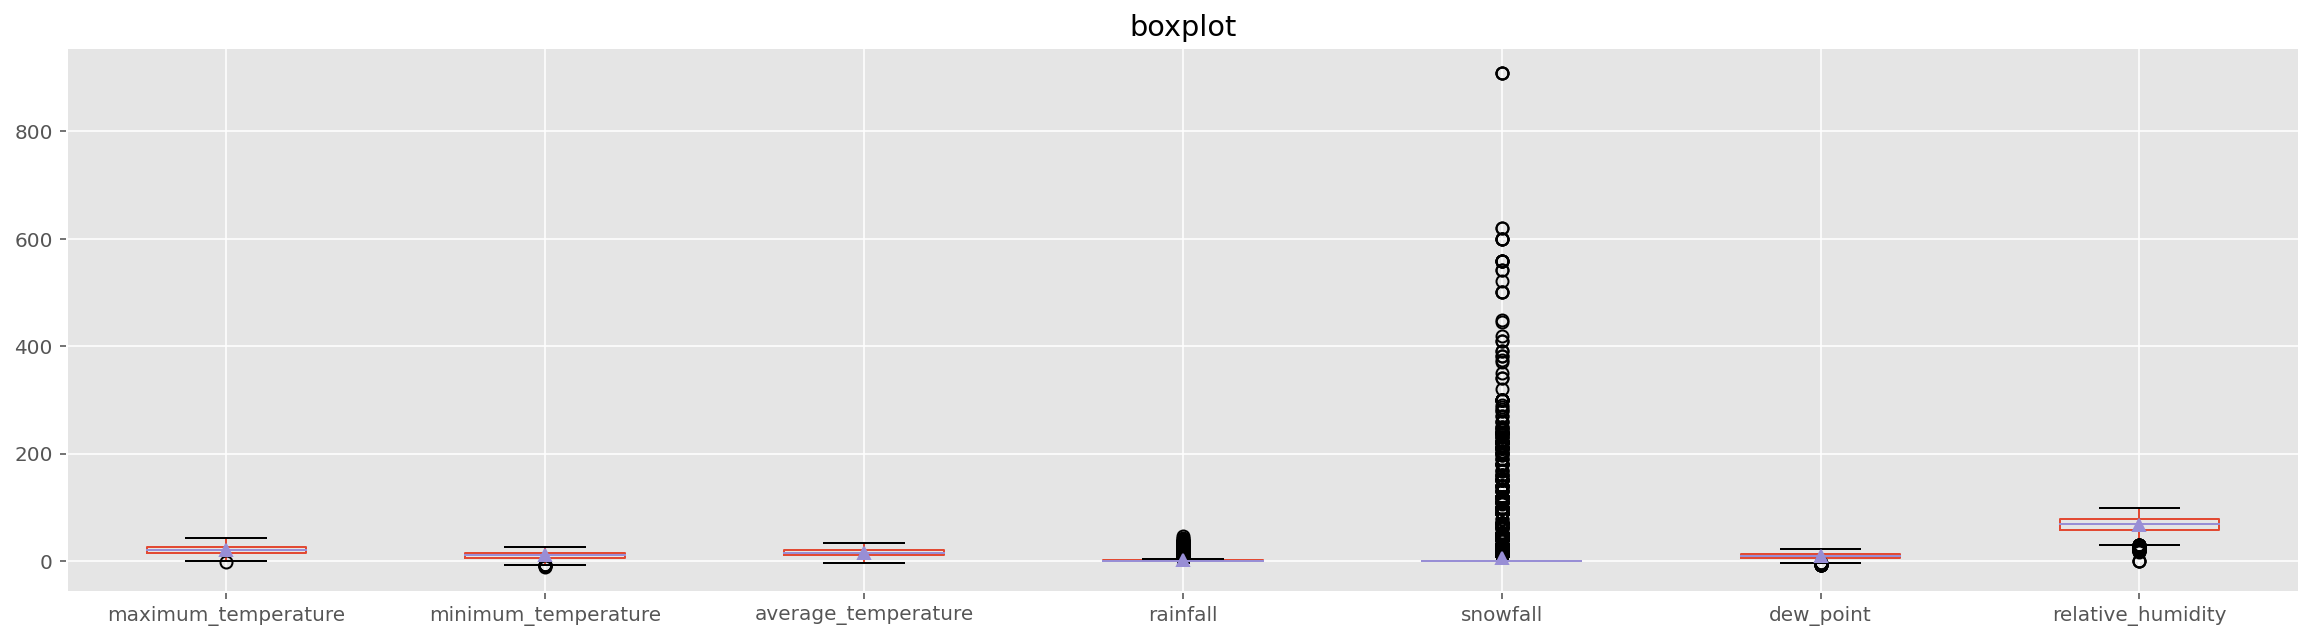

In [65]:
#BOXPLOT DATOS CLIMATOLÓGICOS
ax = df_covid_clima[['maximum_temperature', 'minimum_temperature', 'average_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity']].plot(kind='box', title='boxplot', showmeans=True, figsize=(20, 5))
plt.show()

In [66]:
#Creamos un dataframe para cada variable epidemiológica con la información de climatología 
df_confirmados = df_covid_clima[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','confirmados']].copy()
df_confirmados = df_confirmados.fillna(0)

df_hospitalizados = df_covid_clima[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','hospitalizados']].copy()
df_hospitalizados = df_hospitalizados.fillna(0)

df_uci = df_covid_clima[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','uci']].copy()
df_uci = df_uci.fillna(0)

df_fallecidos = df_covid_clima[['key','average_temperature', 'maximum_temperature', 'minimum_temperature','rainfall','snowfall','dew_point','relative_humidity','fallecidos']].copy()
df_fallecidos = df_fallecidos.fillna(0)


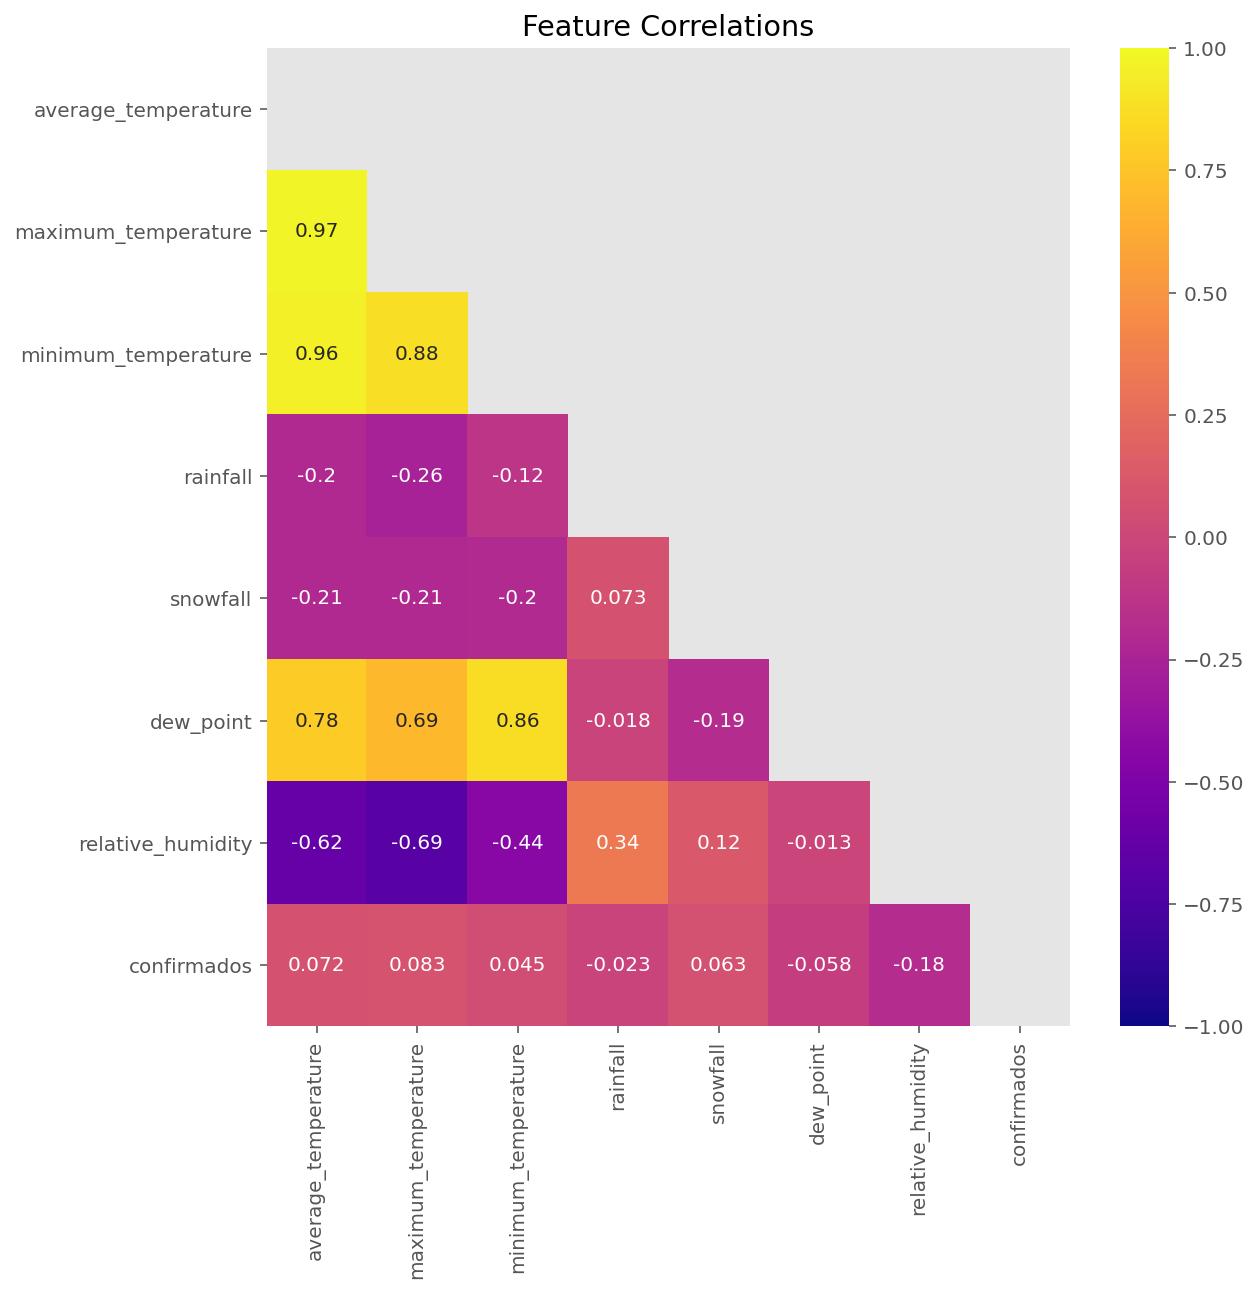

In [67]:
#MATRIZ DE CORRELACIONES CONFIRMADOS
colormap = plt.cm.plasma
matrix1 = np.triu(df_confirmados.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_confirmados.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

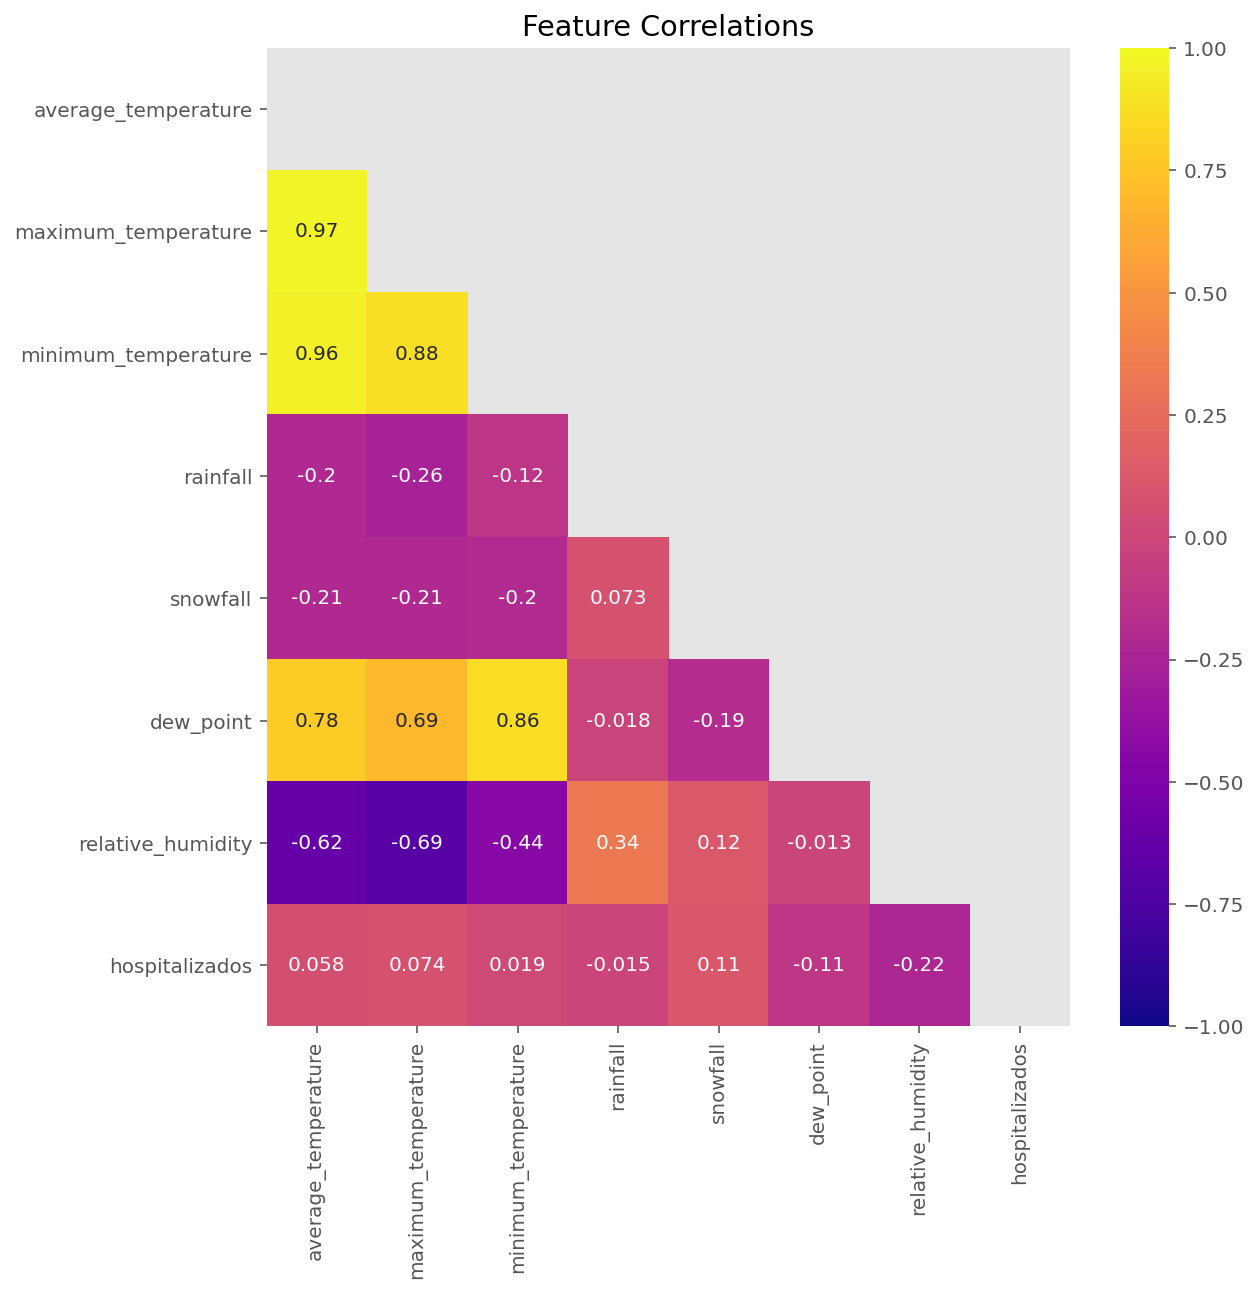

In [68]:
#MATRIZ DE CORRELACIONES HOSPITALIZADOS
colormap = plt.cm.plasma
matrix1 = np.triu(df_hospitalizados.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_hospitalizados.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

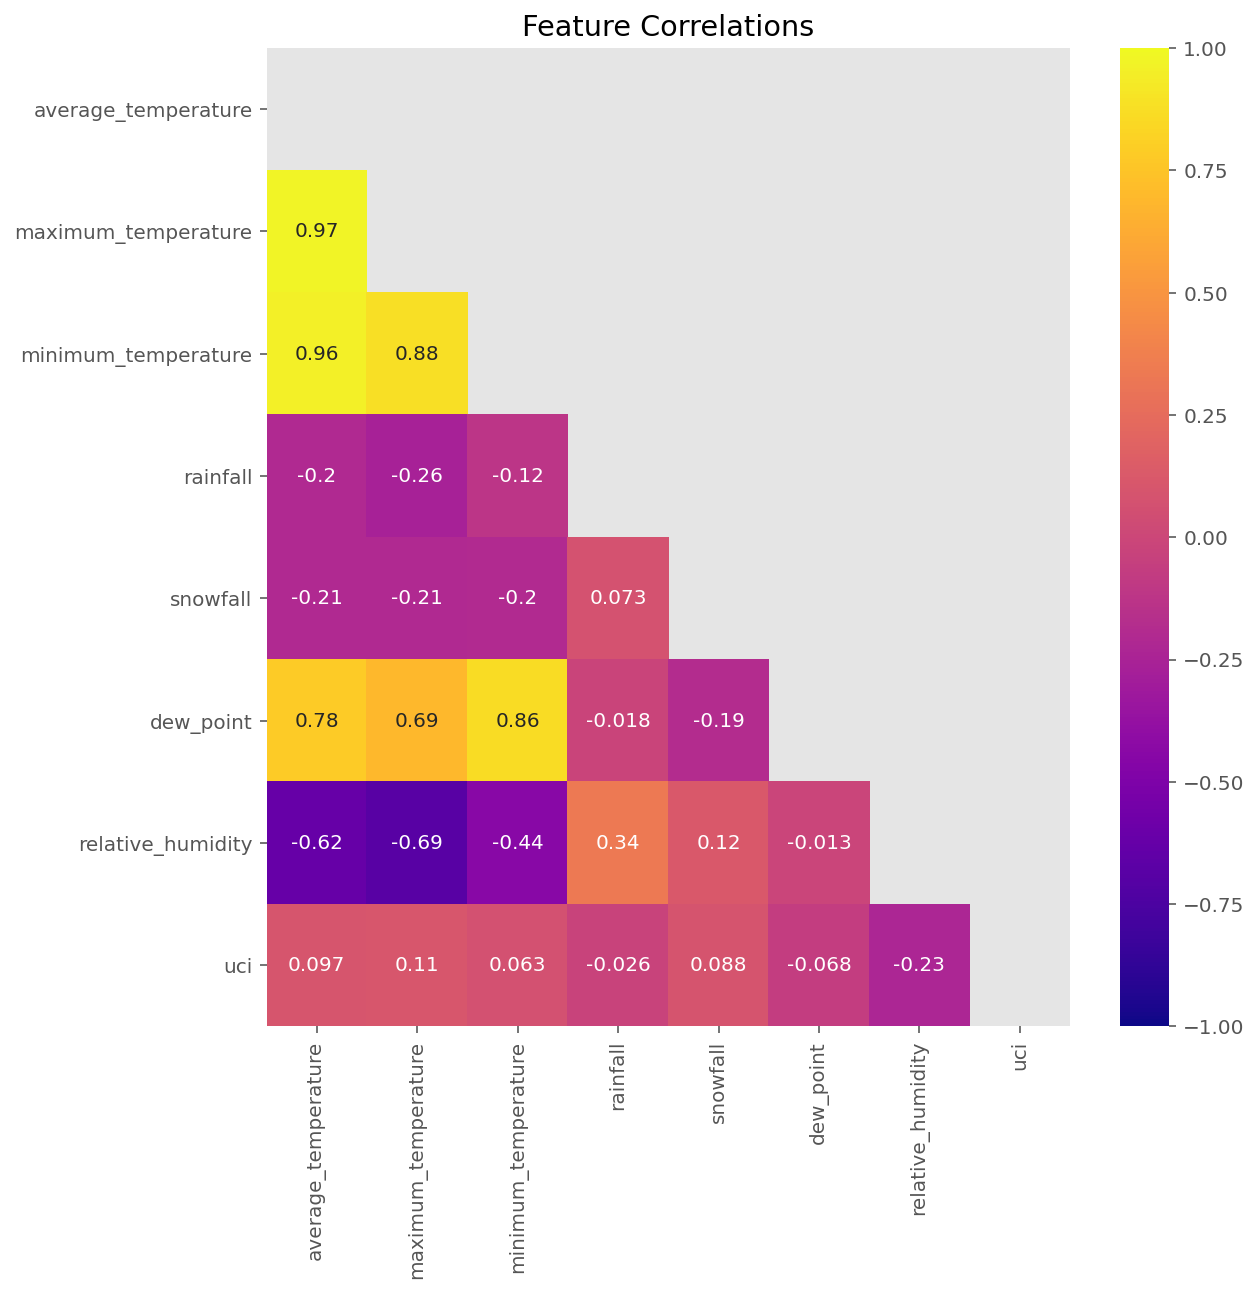

In [69]:
#MATRIZ DE CORRELACIONES UCI
colormap = plt.cm.plasma
matrix1 = np.triu(df_uci.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_uci.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

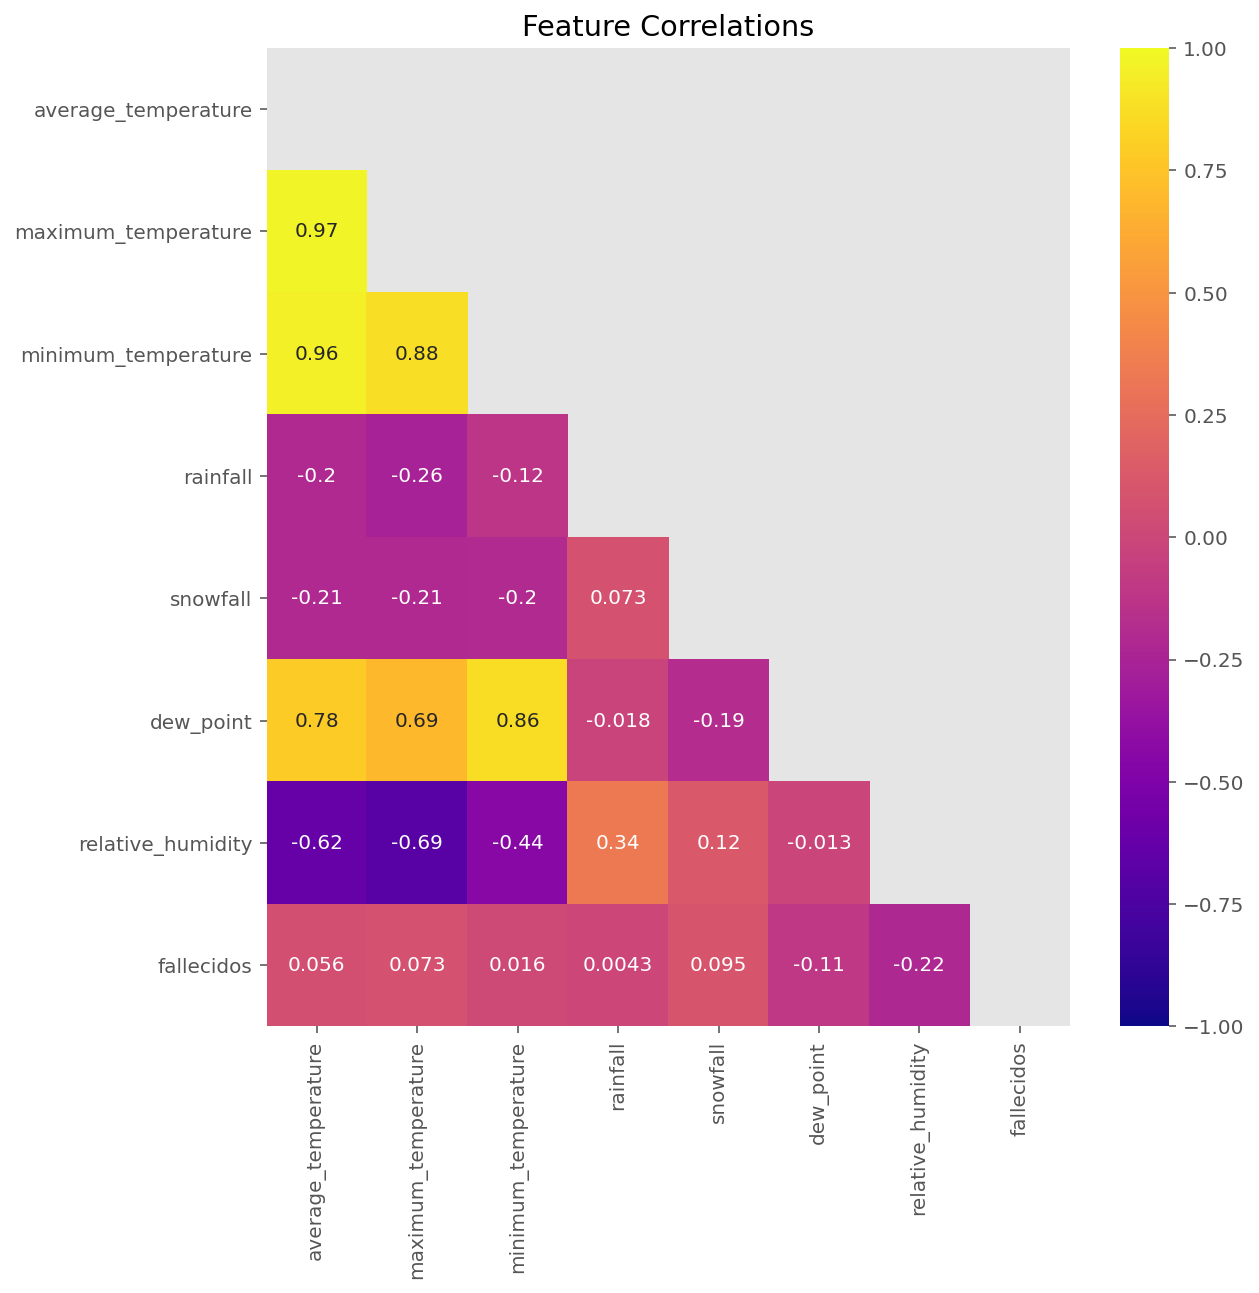

In [70]:
#MATRIZ DE CORRELACIONES FALLECIDOS
colormap = plt.cm.plasma
matrix1 = np.triu(df_fallecidos.corr())
plt.figure(figsize=(9, 9))
sns.heatmap(df_fallecidos.corr(), annot=True, vmax=1, vmin=-1, mask=matrix1, cmap=colormap)
plt.title("Feature Correlations")
plt.show()

In [71]:
#ANALISIS CLUSTER CONFIRMADOS


cols_needed1=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'confirmados']

In [72]:
if len(cols_needed1)==0:
    data2_sub1=df_confirmados.select_dtypes(include='float')
else:
    data2_sub1=df_confirmados[cols_needed1]
data2_sub1=pd.concat([data2_sub1,df_confirmados[['key']]],axis=1)
data2_sub1=data2_sub1.groupby('key').mean().reset_index()
data2_sub1.fillna(0,inplace=True)

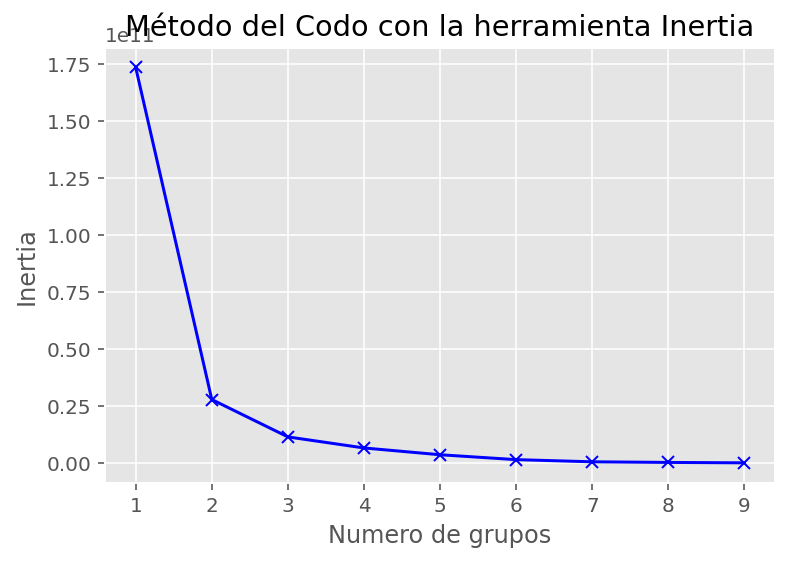

In [73]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub1.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub1.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [74]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub1.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub1.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados
cluster,,,,,,,,
1,15.7,21.0,10.9,1.7,1.5,9.4,69.0,34273.4
2,17.8,24.2,12.0,1.1,0.7,9.4,61.0,211472.5
3,14.3,20.2,8.7,1.7,12.9,6.9,64.9,96634.8
4,15.1,20.4,10.0,2.5,19.6,7.4,63.7,322120.4


In [75]:
today_Sub_2a=pd.concat([data2_sub1[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,confirmados,cluster
0,Andalucía,18.309498,24.993024,12.115929,0.890357,0.222662,9.180841,59.333761,250058.332792,2
1,Aragón,14.815525,21.550909,8.912824,1.297661,3.785260,7.568813,64.040546,59814.394481,1
2,Asturias,13.737769,18.782083,9.233073,2.345216,1.058333,8.950155,74.635041,23321.829545,1
3,Canarias,19.819997,23.365275,16.663293,0.395002,0.000000,11.884302,63.166375,25186.626623,1
4,Cantabria,13.109189,18.671782,8.164201,2.041882,2.616970,8.065278,73.284634,14481.857143,1


In [76]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Aragón', 'Asturias', 'Canarias', 'Cantabria', 'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Comunidad Valenciana']
****Comunidades autónomas en el grupo 3*****
['Castilla y León', 'Castilla-La Mancha', 'País Vasco']
****Comunidades autónomas en el grupo 4*****
['Cataluña', 'Madrid']


In [77]:
import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='confirmados')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [78]:
#ANALISIS CLUSTER HOSPITALIZADOS


cols_needed2=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'hospitalizados']

In [79]:
if len(cols_needed2)==0:
    data2_sub2=df_hospitalizados.select_dtypes(include='float')
else:
    data2_sub2=df_hospitalizados[cols_needed2]
data2_sub2=pd.concat([data2_sub2,df_hospitalizados[['key']]],axis=1)
data2_sub2=data2_sub2.groupby('key').mean().reset_index()
data2_sub2.fillna(0,inplace=True)

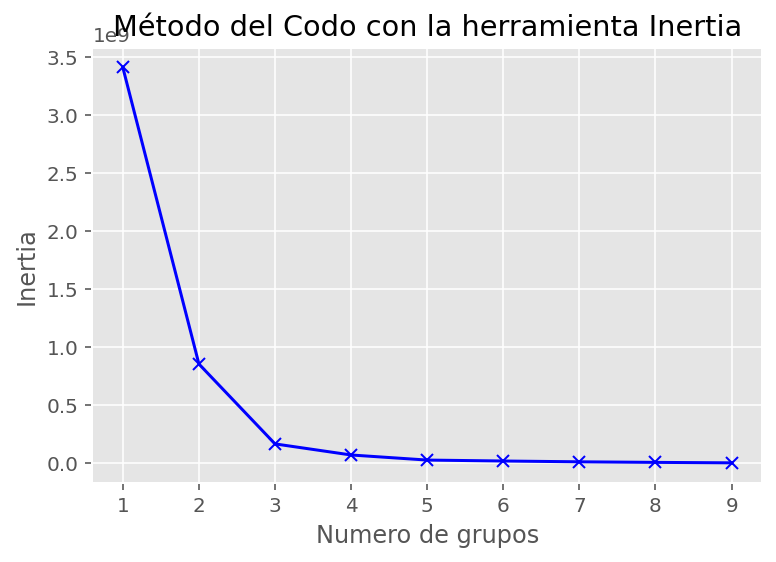

In [80]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub2.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub2.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [81]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub2.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub2.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,hospitalizados
cluster,,,,,,,,
1,15.7,21.0,10.9,1.7,1.5,9.4,69.0,3708.8
2,15.2,20.9,9.5,1.4,33.2,5.7,58.3,60727.3
3,15.1,21.0,9.5,1.6,9.9,7.5,64.3,13451.0
4,16.7,22.5,11.3,2.2,3.1,9.1,64.2,23602.1


In [82]:
today_Sub_2a=pd.concat([data2_sub2[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,hospitalizados,cluster
0,Andalucía,18.309498,24.993024,12.115929,0.890357,0.222662,9.180841,59.333761,21738.915584,4
1,Aragón,14.815525,21.550909,8.912824,1.297661,3.785260,7.568813,64.040546,6831.696429,1
2,Asturias,13.737769,18.782083,9.233073,2.345216,1.058333,8.950155,74.635041,3961.081169,1
3,Canarias,19.819997,23.365275,16.663293,0.395002,0.000000,11.884302,63.166375,2671.569805,1
4,Cantabria,13.109189,18.671782,8.164201,2.041882,2.616970,8.065278,73.284634,1496.378247,1


In [83]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Aragón', 'Asturias', 'Canarias', 'Cantabria', 'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra']
****Comunidades autónomas en el grupo 2*****
['Madrid']
****Comunidades autónomas en el grupo 3*****
['Castilla y León', 'Castilla-La Mancha', 'Comunidad Valenciana', 'País Vasco']
****Comunidades autónomas en el grupo 4*****
['Andalucía', 'Cataluña']


In [84]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='hospitalizados')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [85]:
#ANALISIS CLUSTER UCI


cols_needed3=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'uci']

In [86]:
if len(cols_needed3)==0:
    data2_sub3=df_uci.select_dtypes(include='float')
else:
    data2_sub3=df_uci[cols_needed3]
data2_sub3=pd.concat([data2_sub3,df_uci[['key']]],axis=1)
data2_sub3=data2_sub3.groupby('key').mean().reset_index()
data2_sub3.fillna(0,inplace=True)

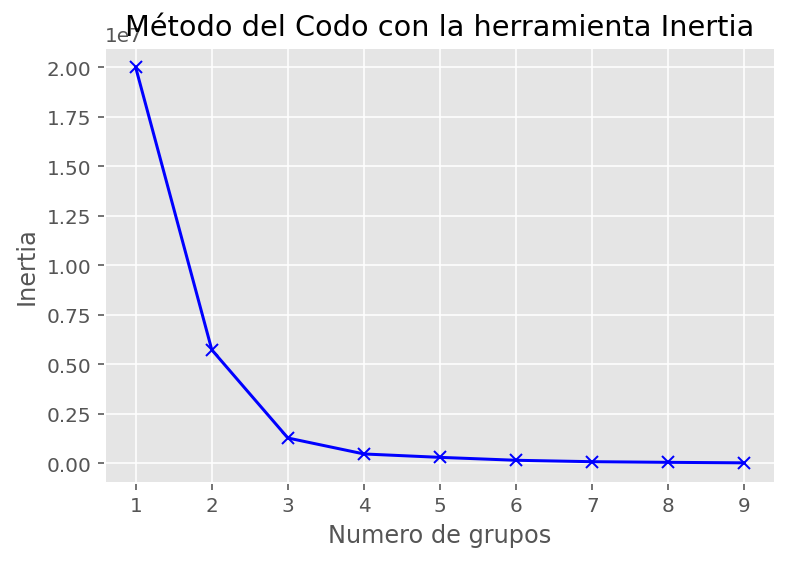

In [87]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub3.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub3.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [88]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub3.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub3.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,uci
cluster,,,,,,,,
1,16.0,21.1,11.2,1.6,1.3,9.6,68.6,351.3
2,16.9,22.8,11.5,1.9,2.4,9.3,63.7,2098.4
3,15.2,20.9,9.5,1.4,33.2,5.7,58.3,4535.0
4,14.4,20.3,9.0,1.9,8.7,7.7,67.1,863.2


In [89]:
today_Sub_2a=pd.concat([data2_sub3[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,uci,cluster
0,Andalucía,18.309498,24.993024,12.115929,0.890357,0.222662,9.180841,59.333761,2394.952922,2
1,Aragón,14.815525,21.550909,8.912824,1.297661,3.785260,7.568813,64.040546,665.282468,4
2,Asturias,13.737769,18.782083,9.233073,2.345216,1.058333,8.950155,74.635041,351.368506,1
3,Canarias,19.819997,23.365275,16.663293,0.395002,0.000000,11.884302,63.166375,525.462662,1
4,Cantabria,13.109189,18.671782,8.164201,2.041882,2.616970,8.065278,73.284634,204.256494,1


In [ ]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Asturias', 'Canarias', 'Cantabria', 'Ceuta y Melilla', 'Ceuta y Melilla ', 'Extremadura', 'Islas Baleares', 'La Rioja', 'Navarra']
****Comunidades autónomas en el grupo 2*****
['Andalucía', 'Cataluña', 'Comunidad Valenciana']
****Comunidades autónomas en el grupo 3*****
['Madrid']
****Comunidades autónomas en el grupo 4*****
['Aragón', 'Castilla y León', 'Castilla-La Mancha', 'Galicia', 'Murcia', 'País Vasco']


In [90]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='uci')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [91]:
#ANALISIS CLUSTER FALLECIDOS


cols_needed4=['average_temperature', 'maximum_temperature',
       'minimum_temperature', 'rainfall', 'snowfall', 'dew_point', 'relative_humidity', 'fallecidos']

In [92]:
if len(cols_needed3)==0:
    data2_sub4=df_fallecidos.select_dtypes(include='float')
else:
    data2_sub4=df_fallecidos[cols_needed4]
data2_sub4=pd.concat([data2_sub4,df_fallecidos[['key']]],axis=1)
data2_sub4=data2_sub4.groupby('key').mean().reset_index()
data2_sub4.fillna(0,inplace=True)

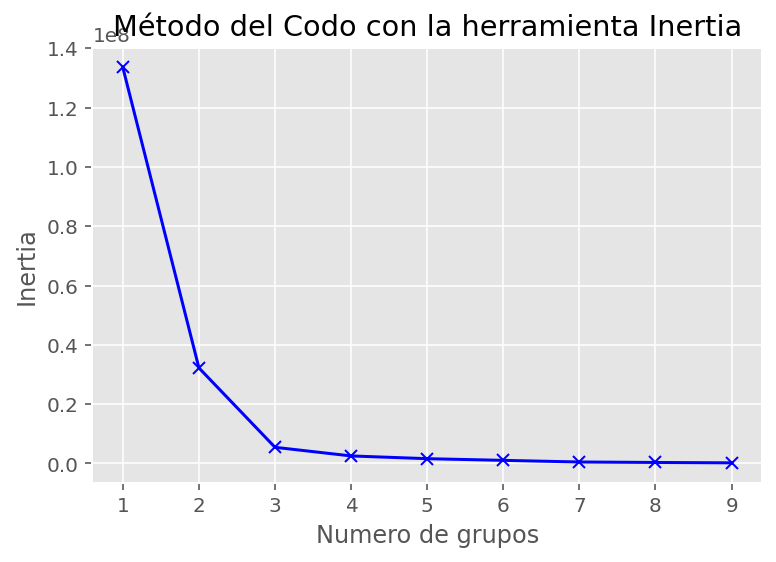

In [93]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data2_sub4.drop(['key'],axis=1)) 
    kmeanModel.fit(data2_sub4.drop(['key'],axis=1))     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Numero de grupos') 
plt.ylabel('Inertia') 
plt.title('Método del Codo con la herramienta Inertia') 
plt.show()

In [94]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Numero de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data2_sub4.drop(['key'],axis=1))
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub1=data2_sub4.drop(['key'],axis=1)
# Adding cluster to the Dataset
today_sub1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub1.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,fallecidos
cluster,,,,,,,,
1,15.8,20.9,11.1,1.8,1.2,9.7,69.5,685.3
2,15.1,20.4,10.0,2.5,19.6,7.4,63.7,9328.3
3,16.2,22.4,10.3,1.1,9.1,7.6,60.9,3935.8
4,14.3,20.4,9.0,2.0,3.7,8.2,68.6,2180.3


In [95]:
today_Sub_2a=pd.concat([data2_sub4[['key']],today_sub1],axis=1)
today_Sub_2a.head(5)

,key,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity,fallecidos,cluster
0,Andalucía,18.309498,24.993024,12.115929,0.890357,0.222662,9.180841,59.333761,4576.899351,3
1,Aragón,14.815525,21.550909,8.912824,1.297661,3.785260,7.568813,64.040546,1899.673701,4
2,Asturias,13.737769,18.782083,9.233073,2.345216,1.058333,8.950155,74.635041,949.090909,1
3,Canarias,19.819997,23.365275,16.663293,0.395002,0.000000,11.884302,63.166375,374.446429,1
4,Cantabria,13.109189,18.671782,8.164201,2.041882,2.616970,8.065278,73.284634,317.964286,1


In [96]:
for i in range(1,5):
    print('****Comunidades autónomas en el grupo {}*****'.format(str(i)))
    print(list(today_Sub_2a[today_Sub_2a.cluster==i]['key'].values))

****Comunidades autónomas en el grupo 1*****
['Asturias', 'Canarias', 'Cantabria', 'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Murcia', 'Navarra']
****Comunidades autónomas en el grupo 2*****
['Cataluña', 'Madrid']
****Comunidades autónomas en el grupo 3*****
['Andalucía', 'Castilla y León', 'Castilla-La Mancha', 'Comunidad Valenciana']
****Comunidades autónomas en el grupo 4*****
['Aragón', 'País Vasco']


In [97]:
#import plotly.express as px
fig = px.treemap(today_Sub_2a, path=['cluster','key'], values='fallecidos')
fig.update_layout(autosize=False,width=800,height=700)

fig.show()

In [ ]:
#---------------------------------------------------

In [ ]:
#MODELOS LINEALES
#Y1. Infectados
#Y2. Hospitalizados
#Y3. Uci
#Y4. Fallecidos

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# División de los datos en train y test
# ==============================================================================
X = df_confirmados.iloc[:,1:(len(df_confirmados.columns)-1)]
y = df_confirmados['confirmados'] # confirmados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                 1.932e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:06:54   Log-Likelihood:            -5.8659e+07
No. Observations:             4422692   AIC:                         1.173e+08
Df Residuals:                 4422684   BIC:                         1.173e+08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3946.1249   2

In [ ]:
# MODELO LINEAL HOSPITALIZADOS

X = df_hospitalizados.iloc[:,1:(len(df_hospitalizados.columns)-1)]
y = df_hospitalizados['hospitalizados'] # hospitalizados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)


,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                 4.570e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:07:03   Log-Likelihood:            -4.9123e+07
No. Observations:             4422692   AIC:                         9.825e+07
Df Residuals:                 4422684   BIC:                         9.825e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.862e+04    

In [ ]:
# MODELO LINEAL UCI
X = df_uci.iloc[:,1:(len(df_uci.columns)-1)]
y = df_uci['uci'] # paciente en uci totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                 3.576e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:07:16   Log-Likelihood:            -3.7990e+07
No. Observations:             4422692   AIC:                         7.598e+07
Df Residuals:                 4422684   BIC:                         7.598e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -855.0932    

In [ ]:
# MODELO LINEAL FALLECIDOS
X = df_fallecidos.iloc[:,1:(len(df_fallecidos.columns)-1)]
y = df_fallecidos['fallecidos'] # paciente en uci totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                 4.090e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:07:28   Log-Likelihood:            -4.2105e+07
No. Observations:             4422692   AIC:                         8.421e+07
Df Residuals:                 4422684   BIC:                         8.421e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -785.2491    

In [ ]:
# MODELO CON K-MEANS PARA DATOS DE CONFIRMADOS

X = df_confirmados.iloc[:,0:-1]
Y = df_confirmados.iloc[:,-1]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())


In [ ]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

In [ ]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

In [ ]:
# MODELO CON ARBOL DE DECISION PARA LOS DATOS DE CONFIRMADOS


from sklearn.tree import DecisionTreeClassifier

# División de los datos en train y test
# ==============================================================================
X = df_confirmados.iloc[:,1:(len(df_confirmados.columns)-1)]
y = df_confirmados['confirmados'] # confirmados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

,average_temperature,maximum_temperature,minimum_temperature,rainfall,snowfall,dew_point,relative_humidity
0,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
1,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
2,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
3,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656
4,8.402778,16.409722,2.8125,0.0,0.0,4.5625,76.98656


In [ ]:
#BUSCAMOS LA MEJOR MAX_DEPTH PARA EL ARBOL 
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

In [ ]:

df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

In [ ]:
# ENTRENAMOS EL MODELO
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

In [ ]:
#GENERAMOS EL GRAFO 
rom sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=df_features.columns, class_names=data.target_names)
plt.show()

In [ ]:
# MODELO CON ARBOL DE DECISION PARA LOS DATOS DE HOSPITALIZADOS


from sklearn.tree import DecisionTreeClassifier

# División de los datos en train y test
# ==============================================================================
X = df_hospitalizados.iloc[:,1:(len(df_hospitalizados.columns)-1)]
y = df_hospitalizados['hospitalizados'] # confirmados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

In [ ]:
#BUSCAMOS LA MEJOR MAX_DEPTH PARA EL ARBOL 
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

In [ ]:
df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

In [ ]:
# ENTRENAMOS EL MODELO
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

In [ ]:
#GENERAMOS EL GRAFO 
rom sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=df_features.columns, class_names=data.target_names)
plt.show()

In [ ]:
# MODELO CON ARBOL DE DECISION PARA LOS DATOS DE UCI

from sklearn.tree import DecisionTreeClassifier

# División de los datos en train y test
# ==============================================================================
X = df_uci.iloc[:,1:(len(df_uci.columns)-1)]
y = df_uci['uci'] # confirmados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

In [ ]:
#BUSCAMOS LA MEJOR MAX_DEPTH PARA EL ARBOL 
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

In [ ]:
df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

In [ ]:
# ENTRENAMOS EL MODELO
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

In [ ]:
#GENERAMOS EL GRAFO 
rom sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=df_features.columns, class_names=data.target_names)
plt.show()

In [ ]:
# MODELO CON ARBOL DE DECISION PARA LOS DATOS DE FALLECIDOS

from sklearn.tree import DecisionTreeClassifier

# División de los datos en train y test
# ==============================================================================
X = df_fallecidos.iloc[:,1:(len(df_fallecidos.columns)-1)]
y = df_fallecidos['fallecidos'] # confirmados totales

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X.head(5)

In [ ]:
#BUSCAMOS LA MEJOR MAX_DEPTH PARA EL ARBOL 
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

In [ ]:
df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

In [ ]:
# ENTRENAMOS EL MODELO
tree_model = DecisionTreeClassifier(random_state=0, max_depth=2)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

In [ ]:
#GENERAMOS EL GRAFO 
rom sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_model, filled=True, max_depth=2, feature_names=df_features.columns, class_names=data.target_names)
plt.show()